# SEPTEMBER 2020 - EXAM

## EXERCISE 5 [0-7 points] 

**Consider the synthetic dataset madelon.csv, collecting 2000 samples (rows) described by 500 features (columns) and belonging to two classes (1 or -1) defined by the last column. Using the PCA dimensionality reduction planar (2D) projection on the 500 describing features, color the samples according to their class and discuss if the patients and controls can be well separated into two distinct groups in the projection. Repeat the same process with the UMAP algorithm and compare the two results.**


Step 1: Importing the libraries 

In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
sns.set(style='white', context='notebook', rc={'figure.figsize':(14,10)})
import csv

from sklearn.datasets import fetch_openml
#from sklearn.decomposition import PCA
#from sklearn.manifold import TSNE
#from sklearn.model_selection import train_test_split
#from sklearn.preprocessing import StandardScaler
#from sklearn.linear_model import LogisticRegression 

%matplotlib inline

In [83]:
df = pd.read_csv("madelon.csv", sep = " ", header = None)
df

,0,1,2,3,4,5,6,7,8,9,...,491,492,493,494,495,496,497,498,499,500
0,485,477,537,479,452,471,491,476,475,473,...,481,477,485,511,485,481,479,475,496,-1
1,483,458,460,487,587,475,526,479,485,469,...,478,487,338,513,486,483,492,510,517,-1
2,487,542,499,468,448,471,442,478,480,477,...,481,492,650,506,501,480,489,499,498,-1
3,480,491,510,485,495,472,417,474,502,476,...,480,474,572,454,469,475,482,494,461,1
4,484,502,528,489,466,481,402,478,487,468,...,479,452,435,486,508,481,504,495,511,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,490,505,503,474,463,461,519,476,518,467,...,479,449,588,499,506,475,463,507,501,1
1996,480,475,476,480,495,482,515,479,480,484,...,474,473,424,454,570,476,493,465,485,-1
1997,480,517,631,470,485,474,535,476,493,466,...,483,479,687,488,488,483,500,523,481,-1
1998,484,481,505,478,542,477,518,477,510,472,...,483,526,750,486,529,484,473,527,485,1


Step 2: Importing the data set
Import the dataset and distributing the dataset into X and y components for data analysis.

In [84]:
# define x 
x = df.iloc[: , :-1]
# define target variable: select last column
y = df.iloc[: , -1].values

Step 3: Splitting the dataset into the Training set and Test set 

In [85]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)


Step 4: Feature Scaling
Doing the pre-processing part on training and testing set such as fitting the Standard scale.

In [86]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Step 5: Applying PCA function
Applying the PCA function into the training and testing set for analysis. 

In [94]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
 
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.56153329, 0.43846671])

Step 6: Fitting Logistic Regression To the training set

In [95]:
from sklearn.linear_model import LogisticRegression 
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

Step 7: Predicting the test set result 

In [96]:
# Predicting the test set result using
# predict function under LogisticRegression
y_pred = classifier.predict(X_test)

Step 8: Making the confusion matrix

In [97]:
# making confusion matrix between
#  test set of Y and predicted value.
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[104,  94],
       [ 64, 138]])

Step 9: Predicting the training set result

sns.color_palette('tab10', 2)

https://seaborn.pydata.org/generated/seaborn.color_palette.html

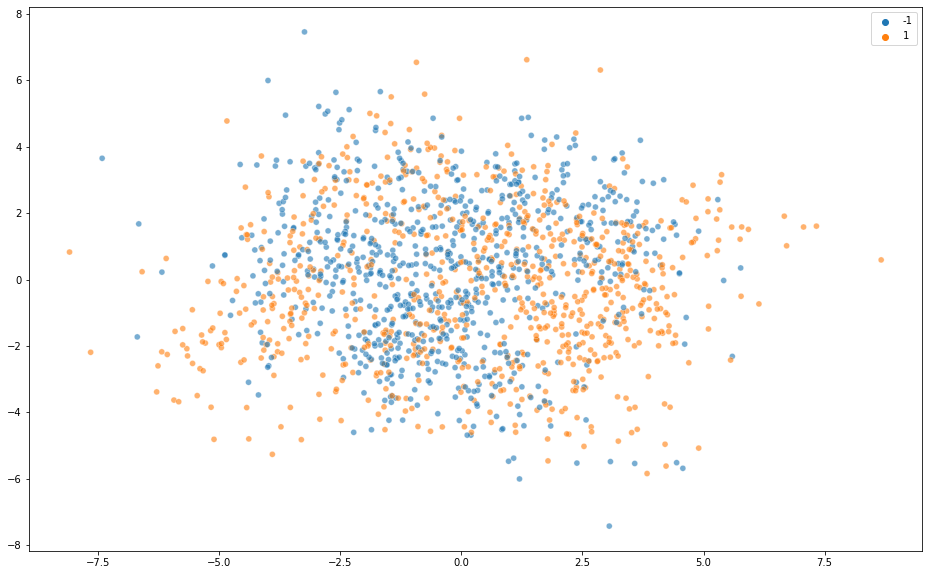

In [121]:
plt.figure(figsize=(16, 10))
sns.scatterplot(x = X_train[:, 0],
                y = X_train[:, 1],
                hue = y_train,
                palette = sns.color_palette('tab10', 2),
                legend = 'full',
                alpha = 0.6)

plt.show()

Step 10: Visualizing the Test set results

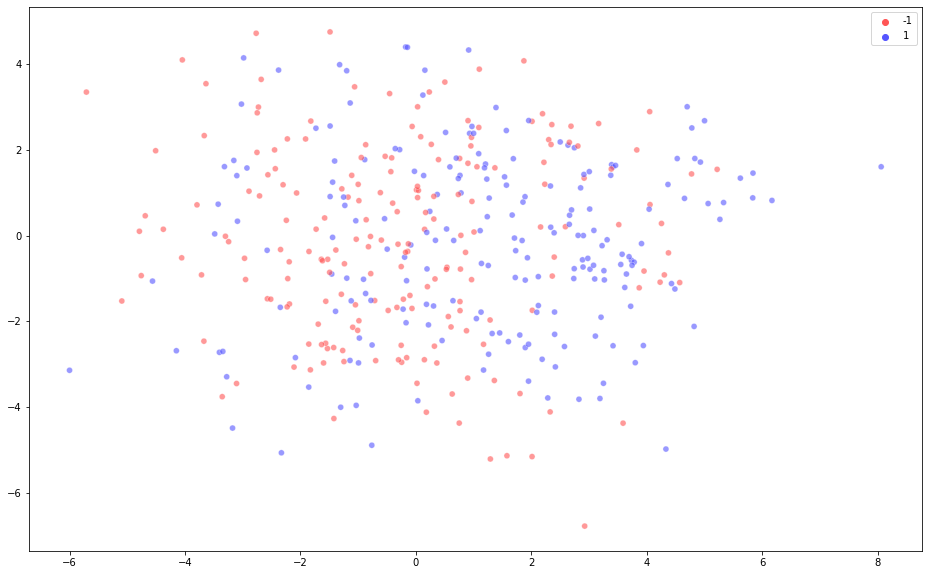

In [119]:
plt.figure(figsize=(16, 10))
sns.scatterplot(x = X_test[:, 0],
                y = X_test[:, 1],
                hue = y_test,
                palette = sns.color_palette('seismic_r', 2),
                legend = 'full',
                alpha = 0.6)

plt.show()